# Proyecto: Buenos Aires Real State analysis
    

## **PARTE A**: **Transformación de datos**

En esta primera parte trabajaremos en el preprocesamiento de datos/ingeniería de atributos. 

Esta etapa es fundamental y determinará el desempeño de los modelos que crearemos posteriormente ya que, como dice el lema, "garbage in, garbage out". 

Teniendo en cuenta lo dicho, intentaremos hacer una limpieza eficiente del dataset que se traduzca luego en buenos desempeños de nuestros modelos de machine learning.

Decidí subdivir la etapa en 5 partes, donde en cada una de ellas se trabajará sobre los siguientes aspectos:

    1. Valores Faltantes
    2. Valores Atípicos 
    3. Escalado de datos/normalización
    4. Transformación de atributos categóricos
    5. Reducción de dimensionalidad
    
Antes de entrar de lleno con la etapa A comenzaré con algunos pasos introductorios como la importación de librerías, carga del dataset y demás.

A) Importa las librerías necesarias para trabajar.

In [1]:
import pandas as pd #Para leer el dataset y crear el dataframe
import numpy as np
import seaborn as sns #Visualizaciones
import matplotlib.pyplot as plt #Visualizaciones

B) Carga y presentación del dataset.

In [2]:
properati=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print('Filas -->', properati.shape[0],'\nColumnas -->', properati.shape[1],'\nSus columnas son:\n')
columnas= dict()
columnas={'start_date':'Fecha de alta del aviso.', 'end_date':'Fecha de baja del aviso.', 'created_on':'Fecha de alta de la primera versión del aviso.', 'lat':'Latitud.', 'lon':'Longitud', 'l1':'Nivel administrativo 1: país.', 'l2':'Nivel administrativo 2: usualmente provincia.', 'l3':'Nivel administrativo 3: usualmente ciudad.',
       'rooms':'Cantidad de ambientes (útil en Argentina).', 'bedrooms':'Cantidad de dormitorios (útil en el resto de los países).', 'bathrooms':'Cantidad de baños.', 'surface_total':'Superficie total en m².', 'surface_covered':'Superficie cubierta en m².',
       'price':'Precio publicado en el anuncio.', 'currency':'Moneda del precio publicado.', 'title':'Título del anuncio.', 'description':'Descripción del anuncio.', 'property_type':'Tipo de aviso (Propiedad, Desarrollo/Proyecto).',
       'operation_type':'Tipo de operación (Venta, Alquiler).'}
for k,v in columnas.items():
    print (k,'-->',v)
properati.head()

Filas --> 146660 
Columnas --> 19 
Sus columnas son:

start_date --> Fecha de alta del aviso.
end_date --> Fecha de baja del aviso.
created_on --> Fecha de alta de la primera versión del aviso.
lat --> Latitud.
lon --> Longitud
l1 --> Nivel administrativo 1: país.
l2 --> Nivel administrativo 2: usualmente provincia.
l3 --> Nivel administrativo 3: usualmente ciudad.
rooms --> Cantidad de ambientes (útil en Argentina).
bedrooms --> Cantidad de dormitorios (útil en el resto de los países).
bathrooms --> Cantidad de baños.
surface_total --> Superficie total en m².
surface_covered --> Superficie cubierta en m².
price --> Precio publicado en el anuncio.
currency --> Moneda del precio publicado.
title --> Título del anuncio.
description --> Descripción del anuncio.
property_type --> Tipo de aviso (Propiedad, Desarrollo/Proyecto).
operation_type --> Tipo de operación (Venta, Alquiler).


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


C) Datatypes check para verificar si es necesario realizar conversiones o no

In [3]:
properati.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

A simple vista, no pareciera necesário hacer conversiones

E) Eliminar filas duplicadas

In [4]:
filas_duplicadas = properati[properati.duplicated()]
print('Cantidad de filas duplicadas:', filas_duplicadas.shape[0])

Cantidad de filas duplicadas: 2358


In [5]:
properati = properati.drop_duplicates()

Ahora si comenzamos con la parte A que mencionamos al principio

1. **Valores Faltantes**: Los valores faltantes son, valga la redundancia, registros sin información. Los motivos por lo cual pueden existir valores faltantes son varios, así como el tratamiento que el data scientist decide hacer sobre los mismos.  

En mi caso, comenzaré sumando la cantidad de instancias vacías por cada atributo para conocer la situación del dataset y luego definiré como continuar el análisis.



In [6]:
def valores_faltantes(df):
    x = ['Columna','Valores Faltantes', '% Valores Faltantes']
    missing_data = pd.DataFrame(columns=x)
    columns = df.columns
    for col in columns:
        icolumn_name = col
        imissing_data = df[col].isnull().sum()
        imissing_in_percentage = round((df[col].isnull().sum()/df[col].shape[0])*100,2)

        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, imissing_in_percentage]
    return pd.DataFrame(missing_data)
valores_faltantes(properati)

,Columna,Valores Faltantes,% Valores Faltantes
0,start_date,0,0.00
1,end_date,0,0.00
2,created_on,0,0.00
3,lat,9572,6.63
4,lon,9606,6.66
5,l1,0,0.00
6,l2,0,0.00
7,l3,0,0.00
8,rooms,0,0.00
9,bedrooms,0,0.00


Observo que aproximadamente un 7 % del dataset contiene valores nulos para los atributos de `lat` y `long`. Sin embargo, decidí dejarlos ya que que los atributos `l1`,`l2` y `l3` pueden darme información suficiente acerca de la localización de las instancias y no presentan valores nulos.

Para los casos de `surface_covered` y `surface_total`, primero  eliminaré aquellas instancias donde `surface_covered` sea mayor que `surface_total` ya que no tiene mucho sustento lógico. Posteriormente, eliminaré las instancias con valores nulos dado que son una porción no muy grande de la muestra y además los considero atributos complejos para imputarlos con valores estadísticos u otras técnicas. 


In [7]:
surfacecheck = properati[properati['surface_covered']>properati['surface_total']]
print('Cantidad de Instancias donde sup. cov > sup. tot:', surfacecheck.shape[0])
properati = properati.drop(properati[properati['surface_covered']>properati['surface_total']].index)

Cantidad de Instancias donde sup. cov > sup. tot: 1431


In [8]:
properati.dropna(subset = ["surface_total",'surface_covered'], axis = 0, inplace=True)

Por último, para la variable `bathrooms`, ordenaré las instancias según los atributos que mayor correlación presenten con la variable en cuestión y luego imputaré valores faltantes tomando los valores de la instancia próxima.

Ejecutaré también la función `describe` para corroborar que no haya grandes variaciones en los valores estadísticos de la varibale `bathrooms` luego de la imputación.

In [9]:
properati[['bathrooms']].describe()

,bathrooms
count,119326.000000
mean,1.588774
std,0.875091
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,14.000000


In [10]:
properati.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.697654,-0.058190,-0.036106,0.096693,-0.015572,-0.001267,0.095518
lon,-0.697654,1.000000,-0.025994,-0.046624,-0.076466,-0.048484,-0.015834,0.036466
rooms,-0.058190,-0.025994,1.000000,0.910609,0.610009,0.102870,0.083344,0.407422
bedrooms,-0.036106,-0.046624,0.910609,1.000000,0.618407,0.097638,0.081336,0.386295
bathrooms,0.096693,-0.076466,0.610009,0.618407,1.000000,0.079184,0.073808,0.562083
surface_total,-0.015572,-0.048484,0.102870,0.097638,0.079184,1.000000,0.530106,0.045383
surface_covered,-0.001267,-0.015834,0.083344,0.081336,0.073808,0.530106,1.000000,0.057754
price,0.095518,0.036466,0.407422,0.386295,0.562083,0.045383,0.057754,1.000000


Como se puede ver, la variable que mas correlación tiene con el atributo `bathrooms` es `rooms` seguida de `bedrooms`. 

Prosigo entonces con la técnica que describí en la celda anterior:

In [11]:
properati.sort_values(by=['bedrooms','rooms'],ascending=True, inplace=True)
properati[['bathrooms']] = properati[['bathrooms']].fillna(method='ffill')

Una vez imputados los valores para la variable `bathrooms` volveré a ejecutar la función `describe` para corroborar lo que mencioné anteriormente.

In [12]:
properati[['bathrooms']].describe()

,bathrooms
count,121023.000000
mean,1.588153
std,0.874999
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,14.000000


Se puede observar que la imputación no ha causado grandes modificaciones en el dataset, de hecho, los primeros dos décimales de todos los estadísticos se mantienen constantes.

Volveré a contar ahora las instancias vacías por columna para verificar que no continúen existiendo valores faltantes (Sólo deberían existir en las columnas `lat` y `lon`).

In [13]:
def valores_faltantes(df):
    x = ['Columna','Valores Faltantes', '% Valores Faltantes']
    missing_data = pd.DataFrame(columns=x)
    columns = df.columns
    for col in columns:
        icolumn_name = col
        imissing_data = df[col].isnull().sum()
        imissing_in_percentage = round(((df[col].isnull().sum()/df[col].shape[0])*100),2)

        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, imissing_in_percentage]
    return pd.DataFrame(missing_data)
valores_faltantes(properati)

,Columna,Valores Faltantes,% Valores Faltantes
0,start_date,0,0.00
1,end_date,0,0.00
2,created_on,0,0.00
3,lat,8118,6.71
4,lon,8118,6.71
5,l1,0,0.00
6,l2,0,0.00
7,l3,0,0.00
8,rooms,0,0.00
9,bedrooms,0,0.00


2. **Valores Atípicos**: Los valores atípicos son aquellos que difieren significativamente del resto de las observaciones pudiendo entorpecer nuestros distintos análisis. Nuevamente, sus causas pueden ser muy variadas, como por ejemplo fallas en el instrumento de medición, errores al cargar los datos, error de criterio al seleccionar la muestra, entre otras.

Comenzaré esta segunda subsección observando la distribución de las variables numéricas del dataset.



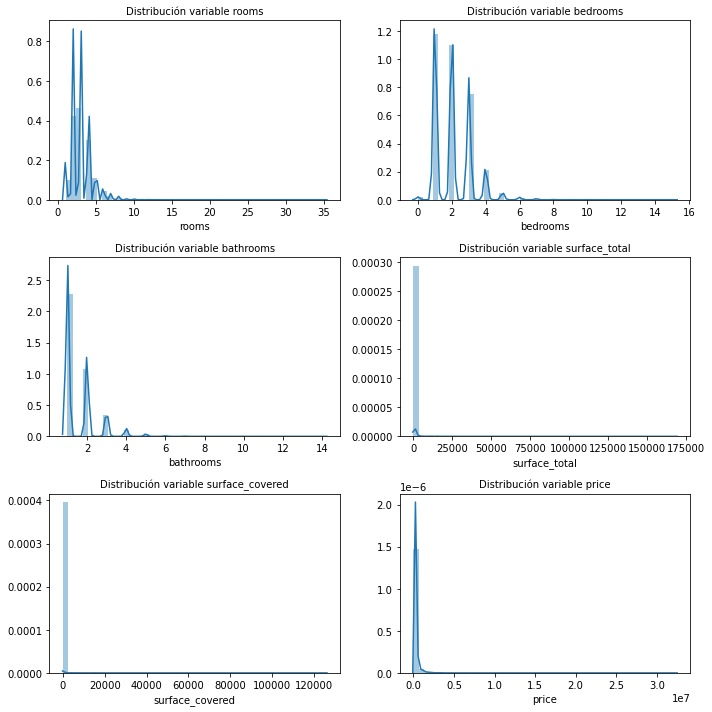

In [14]:
plt.figure(figsize = (10,10))
plt.subplot(3,2,1)
plt.title('Distribución variable rooms', fontsize=10)
sns.distplot(properati['rooms'])
plt.subplot(3,2,2)
plt.title('Distribución variable bedrooms', fontsize=10)
sns.distplot(properati['bedrooms'])
plt.subplot(3,2,3)
plt.title('Distribución variable bathrooms', fontsize=10)
sns.distplot(properati['bathrooms'])
plt.subplot(3,2,4)
plt.title('Distribución variable surface_total', fontsize=10)
sns.distplot(properati['surface_total'])
plt.subplot(3,2,5)
plt.title('Distribución variable surface_covered', fontsize=10)
sns.distplot(properati['surface_covered'])
plt.subplot(3,2,6)
plt.title('Distribución variable price', fontsize=10)
sns.distplot(properati['price'])
plt.tight_layout()
plt.show() 

Los histogramas muestran que todas las variables presentan distribuciones dispersas, especialmente el caso de `price` y `surface`.

Para que dichas disperciones no interfieran en el análisis es necesário hacer una limpieza del dataset.

Para limpiar aquellos outliers que alteran el trabajo decidí utilizar el método conocido como "IQR Score Technique".

En un primer momento realizaré gráficos de tipo boxplot que me ayudarán a identificar los outliers y luego aplicaré una fórmula para limpiarlos y trabajar solamente con aquellos valores dentro del rango intercuartílico. 

Antes, eliminaré columnas que considero irrelevantes como `title`, `description`, `start_date`, `end_date`, `created_on`. Para el caso particular de las variables `operation_type` la elimino ya que todos los anuncios son de venta, `lat` y `lon` ya he explicado anteriormente que no voy a utilizarlos, `l1` ya que todos los registros corresponden a Argentina y `currency` debido a que todos los registros están expresados en USD.

In [15]:
properati = properati.drop(['lat','lon','title','description', 'currency', 'l1','start_date','end_date','created_on','operation_type'], axis=1)

Ahora si comenzamos con los gráficos boxplot

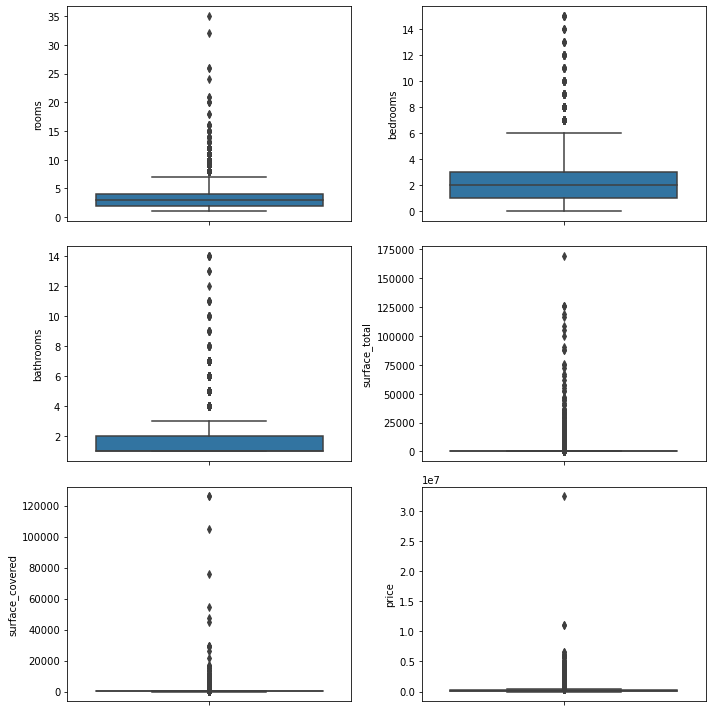

In [16]:
plt.figure(figsize = (10,10))
plt.subplot(3,2,1)
sns.boxplot(x=properati['rooms'], orient='v')
plt.tight_layout()
plt.subplot(3,2,2)
sns.boxplot(x=properati['bedrooms'], orient='v')
plt.tight_layout()
plt.subplot(3,2,3)
sns.boxplot(x=properati['bathrooms'], orient='v')
plt.tight_layout()
plt.subplot(3,2,4)
sns.boxplot(x=properati['surface_total'], orient='v')
plt.tight_layout()
plt.subplot(3,2,5)
sns.boxplot(x=properati['surface_covered'], orient='v')
plt.tight_layout()
plt.subplot(3,2,6)
sns.boxplot(x=properati['price'], orient='v')
plt.tight_layout()
plt.tight_layout()
plt.show() 

Definimos en Rango Intercuartílico IQR

In [17]:
Q1 = properati.quantile(0.25)
Q3 = properati.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

rooms                   2.0
bedrooms                2.0
bathrooms               1.0
surface_total          88.0
surface_covered        61.0
price              153000.0
dtype: float64


Filtramos aquellos valores que queden por fuera

In [18]:
properati = properati[~((properati < (Q1-1.5 * IQR)) |(properati > (Q3 + 1.5 * IQR))).any(axis=1)]
properati.shape

(100408, 9)

3. **Escalado de datos**: El escalado de datos es una práctica que busca solucionar el problema de las diferentes unidades y escalas en las que se presentan los distintos atributos del dataset, tiene por objetivo unificar la expresión de los atributos en una misma unidad y escala.

Existen varias técnicas para llevar a cabo el escalado de datos, en mi caso decidí utilizar la técnica de Z-Score que básicamente lo que hace es contar la distancia al valor medio para cada valor de la muestra en “unidades” de desviación estándar.

Para aplicar esta técnica utilicé la función `StandardScaler` de la librearia ScikitLearn.

Lo primero que hago es importar la función de la librería y seguidamente defino en una variable `columnas` las columnas a escalar. Excluiré del escalado al atributo `price` ya que es mi `y` y las variables categóricas ya que lógicamente es imposible escalar las mismas.

Todo esto lo haré sobre una copia del dataset para luego poder comparar si realmente ayudó o no.

In [19]:
from sklearn.preprocessing import StandardScaler

properati_norm = properati.copy()
columnas = ['rooms', 'bedrooms','bathrooms','surface_total','surface_covered']
features = properati_norm[columnas]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [20]:
properati_norm[columnas] = features

Para corroborar que el método esté funcionando correctamente volveré a graficar algunas distribuciones comparando el dataset original con el escalado. En éste último las distribuciones deberían ser mas compactas y centradas en cero.

Evaluaremos por ejemplo las variables `surface_total` y `surface_covered` que ya vimos que eran las que mayor disperción presentaban.

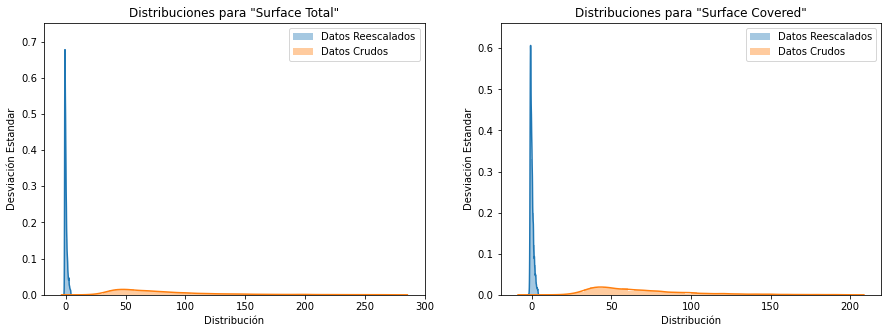

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(properati_norm.surface_total.values, label = 'Datos Reescalados')
sns.distplot(properati.surface_total.values, label = 'Datos Crudos')
plt.legend()
plt.title('Distribuciones para "Surface Total"', loc='center')
plt.xlabel('Distribución')
plt.ylabel('Desviación Estandar')
plt.subplot(1,2,2)
sns.distplot(properati_norm.surface_covered.values, label = 'Datos Reescalados')
sns.distplot(properati.surface_covered.values, label = 'Datos Crudos')
plt.legend()
plt.title('Distribuciones para "Surface Covered"', loc='center')
plt.xlabel('Distribución')
plt.ylabel('Desviación Estandar')
plt.show()

Como se puede observar, el escalando ha dado resultado, la distribución de los datos tiende a 0 y la desviación estandar a 1

4. **Transformación de atributos categóricos**: Muchas veces sucede que el dataset contiene variables cualitativas, es decir, variables no numéricas. 

Nuestro caso no es la excepción ya que como pudimos ver, a pesar de la limpieza que venimos haciendo, aún mantenemos columnas como `l2`,`l3` y `property_type` que contienen información de tipo texto. El problema con estas variables es que nuestros modelos de machine learning no van a poder interpretarlas de esta forma, por ello es necesário transformarlas a variables de tipo número.

En este caso, como nuestras variables categóricas son de tipo nominal (no existe una relación de orden) el método que utilizaré para transformarlas se conoce como `One-Hot-Encoding` y lo haré utilizando la función `get_dummies`.

In [22]:
properati2 = pd.get_dummies(properati_norm, prefix=['l2','l3','property_type']).drop('property_type_PH', axis='columns')
properati2.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l2_Bs.As. G.B.A. Zona Norte,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal,...,l3_Villa del Parque,property_type_Casa,property_type_Casa de campo,property_type_Cochera,property_type_Departamento,property_type_Depósito,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro
597,-1.736945,-2.115208,-0.637731,-0.709341,-0.807023,142000.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
604,-1.736945,-2.115208,-0.637731,-1.038537,-1.148547,79000.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
605,-1.736945,-2.115208,-0.637731,-0.753234,-0.807023,91225.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
606,-1.736945,-2.115208,-0.637731,-0.665448,-0.807023,95325.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
607,-1.736945,-2.115208,-0.637731,-0.665448,-0.807023,92070.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


5. **Reducción de dimensionalidad**: Como ya sabemos, trabajar con una gran cantidad de dimensiones suele ser un problema, incusive hasta hemos dedicado un tiempo a estudiar la famosa "Maldición de la dimensionalidad". 

Es justamente para evitar esta serie de problemas que trabajamos en la reducción de la dimensionalidad. La misma consiste básicamente en resumir la mayor cantidad de información en la menor cantidad de atributos posibles. Esto trae como beneficios una mejora en la eficiencia de los modelos, detección de features relevantes en dataset y muchas veces puede ayudarnos tambien a facilitar la visualización.

En este caso, para reducir la dimensionalidad del dataset, decidí utilizar la técnica conocida como PCA (Principal Component Analysis), la cual se podría decir que es un modelo que selecciona las variables que más “peso” tienen dentro de los datos.

Yendo un poco a la aplicación práctica de esta técnica, lo primero que voy a hacer es importar el módulo `PCA` de la librería ScikitLearn. Luego, para determinar a qué cantidad de componentes conviene reducir el dataset realizaré un gráfico que mostrará la evolución de la varianza explicada acumulada en función del N° de componentes.

Text(0, 0.5, 'Varianza Explicada Acumulada')

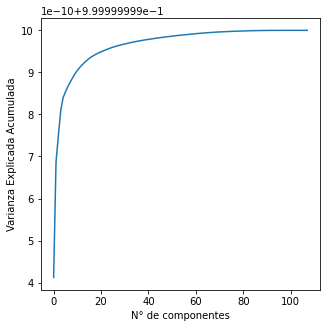

In [23]:
from sklearn.decomposition import PCA
plt.figure(figsize=(5,5))
plt.xscale('linear')
pca = PCA().fit(properati2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('N° de componentes')
plt.ylabel('Varianza Explicada Acumulada')

El gráfico nos indica que con 10 componentes se conserva el 90% de la información, lo cual considero suficiente. 

Como se puede observar, después de haber realizado el `One-Hot Encoding` nos había quedado un extenso dataset de 108 columnas el cual estamos reduciendo a aproximadamente un 9% de su tamaño sin perder demasiada información. 

Ahora que ya definí en N° de componentes continuaré con la aplicación

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
modelored = pca.fit_transform(properati2.drop('price',axis='columns')) #De nuevo, excluyo 'price' ya que es mi variable a predecir

In [25]:
properati3 = pd.DataFrame(modelored)
properati3

,0,1,2,3,4,5,6,7,8,9
0,-2.753251,0.474937,0.838183,-0.795006,-0.108913,-0.132269,-0.042889,-0.211933,-0.070356,-0.265535
1,-3.065821,0.525296,0.586449,-0.578979,0.025914,-0.068515,-0.068092,-0.086974,-0.110015,-0.262981
2,-2.739473,0.492836,1.436099,0.410754,-0.397198,-0.045627,-0.139738,0.051672,-0.127984,-0.223888
3,-2.700017,0.478834,1.485154,0.387711,-0.387114,-0.012373,-0.103171,0.034515,-0.118826,-0.222017
4,-2.700017,0.478834,1.485154,0.387711,-0.387114,-0.012373,-0.103171,0.034515,-0.118826,-0.222017
...,...,...,...,...,...,...,...,...,...,...
100403,5.346081,-1.241737,-3.300124,1.306387,0.604707,0.546062,-0.358647,0.163373,-0.092998,0.429555
100404,7.507850,-1.696728,-1.525367,0.110553,-0.394738,-0.177781,-0.624581,0.193957,-0.022472,0.481270
100405,7.507850,-1.696728,-1.525367,0.110553,-0.394738,-0.177781,-0.624581,0.193957,-0.022472,0.481270
100406,6.017519,-1.381992,-2.786767,0.891366,0.269204,0.308880,-0.550785,0.077500,-0.126647,0.401705


Con esto queda concluída la etapa de preoprocesamiento, ahora podemos aedntrarnos en los modelos.

## **PARTE B**: **Modelos Avanzados**


Los modelos con los que trabajaré son: Regresión Lineal con atributos polinómicos y regularización Lasso, regularización Ridge, RandomForest y XGBoost.

Para buscar la máxima optimización de los mismos combinaré las técnicas de RandomSearch, GridSearch y Validación Cruzada. 

La idea con esto es comenzar acotando el espacio de hiperparámetros y luego estudiar específicamente dicho espacio acotado, evaluando en todo momento que el modelo sea representativo.

Para ello inciamos con el método RandomSearch que nos permitirá obtener una muestra aleatoria, a la cual podemos considerar representativa acerca del espacio de combinaciones de hiperparámetros. 

Una vez obtenida dicha muestra, el segundo paso será concentrar el análisis en el nuevo espacio reducido de hiperparámetros; esto es, el espacio definido entre los dos mejores valores para cada hiperparámetro del modelo. Para analizar dicho "subespacio" utilizaremos el método GridSearch.

Finalmente, para asegurarnos que nuestro modelo sea representativo, evaluaremos el mismo utilizando el método de Validación Cruzada.

Llendo al código, en primer lugar importamos las librerías necesarias

In [27]:
import scipy as sp
from scipy import stats
from scipy.stats import randint
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

Luego defino los modelos, los entreno y construyo los inputs de la grilla que utilizaré para GridSearch.

1. **Regresión Lineal con atributos polinómicos y regularización Lasso**

Lo primero que haré aquí es agregar dos grados al dataset mediante la función `PolynomialFeatures`. 

Luego crearé nuevas variables `X_test_rnl` y `X_train_rnl` para utilizar en la construcción de modelos de regresión no lineal.


In [34]:
poli = PolynomialFeatures(2, include_bias=False)
X_train_rnl = poli.fit_transform(X_train)
X_test_rnl = poli.fit_transform(X_test)
print(X_train.shape, X_train_rnl.shape)

(70285, 10) (70285, 65)


Como podemos ver, luego de agregarle grados al dataset pasamos de tener 10 atributos a 65. 

Seguimos ahora definiendo la grilla que utilizaremos para RandomSearch y luego entrenamos e imprimimos parámetros y scores.


In [35]:
# Modelo Regularización Lasso
reg_lasso = Lasso()

# Grilla Random Regularización Lasso
grillarandom_reg_lasso = {'alpha':[10, 5, 1, 0.5, 0.1 ,0.01, 0.005, 0.001],
              'warm_start': ['True', 'False'], 
              'selection' : ['cyclic', 'random']}

# Random Search
random_reg_lasso = RandomizedSearchCV(reg_lasso, grillarandom_reg_lasso,n_iter=20, random_state=0, cv=5)

# Entrenamos: Lasso con la grilla definida arriba y CV con tamaño de Fold=5
random_reg_lasso.fit(X_train_rnl,y_train)

print("Mejores parametros: "+str(random_reg_lasso.best_params_))
print("Mejor Score: "+str(random_reg_lasso.best_score_)+'\n')

scores_random_reg_lasso = pd.DataFrame(random_reg_lasso.cv_results_).sort_values(by=['rank_test_score'],ascending=True).reset_index(drop=True)
scores_random_reg_lasso

Mejores parametros: {'warm_start': 'True', 'selection': 'cyclic', 'alpha': 0.001}
Mejor Score: 0.6945751161916279



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_selection,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.074106,0.524982,0.005059,0.003382,True,cyclic,0.001,"{'warm_start': 'True', 'selection': 'cyclic', ...",0.695916,0.690339,0.695721,0.695106,0.695794,0.694575,0.002136,1
1,7.065469,0.060284,0.004643,0.004404,False,cyclic,0.005,"{'warm_start': 'False', 'selection': 'cyclic',...",0.695913,0.690337,0.695717,0.695103,0.695791,0.694572,0.002136,2
2,6.981170,0.208376,0.000400,0.000490,True,cyclic,0.005,"{'warm_start': 'True', 'selection': 'cyclic', ...",0.695913,0.690337,0.695717,0.695103,0.695791,0.694572,0.002136,2
3,6.619549,0.049386,0.004645,0.002792,True,cyclic,0.01,"{'warm_start': 'True', 'selection': 'cyclic', ...",0.695909,0.690334,0.695713,0.695100,0.695787,0.694568,0.002136,4
4,6.716174,0.123061,0.005122,0.003471,True,cyclic,0.1,"{'warm_start': 'True', 'selection': 'cyclic', ...",0.695837,0.690279,0.695637,0.695034,0.695720,0.694501,0.002129,5
5,6.937971,0.080815,0.005687,0.003979,False,cyclic,0.1,"{'warm_start': 'False', 'selection': 'cyclic',...",0.695837,0.690279,0.695637,0.695034,0.695720,0.694501,0.002129,5
6,7.379708,0.606337,0.001717,0.002961,False,cyclic,0.5,"{'warm_start': 'False', 'selection': 'cyclic',...",0.695506,0.690029,0.695289,0.694734,0.695414,0.694194,0.002100,7
7,7.016373,0.104006,0.003749,0.003987,True,cyclic,1,"{'warm_start': 'True', 'selection': 'cyclic', ...",0.695076,0.689695,0.694833,0.694344,0.695006,0.693791,0.002064,8
8,7.066200,0.199311,0.004298,0.002707,False,random,0.01,"{'warm_start': 'False', 'selection': 'random',...",0.693956,0.688862,0.693656,0.693314,0.693853,0.692728,0.001945,9
9,6.419146,0.158935,0.003683,0.003356,True,random,0.005,"{'warm_start': 'True', 'selection': 'random', ...",0.693807,0.688737,0.693907,0.693356,0.693707,0.692703,0.001991,10


Ahora que ya conocemos las combinaciones que mejor performan, podemos acotar el espacio que vamos a analizar mediante GridSearch.

Para automatizar la entrada de datos a la grilla de GridSearch escribí el siguiente código donde para cada hiperparámetro creamos una arreglo organizado de menor a mayor con el intervalo de valores existente entre el primer y segundo top score. Para el caso de los valores categóricos, simplemente guardamos qué valor tomó el hiperparámetro en cada pueba.

In [36]:
first_alpha__reg_lasso = scores_random_reg_lasso.iloc[0,6]
second_alpha__reg_lasso = scores_random_reg_lasso.iloc[1,6]
if first_alpha__reg_lasso < second_alpha__reg_lasso:
    reg_lasso_alpha=np.arange(first_alpha__reg_lasso,second_alpha__reg_lasso+1,1)
elif first_alpha__reg_lasso == second_alpha__reg_lasso:
    reg_lasso_alpha=[first_alpha__reg_lasso]
else:
    reg_lasso_alpha=np.arange(second_alpha__reg_lasso,first_alpha__reg_lasso+1,1)
#-----------------------------------------------------------------------------------------------------------------------    
first_warm_start_reg_lasso = scores_random_reg_lasso.iloc[0,4]
second_warm_start_reg_lasso = scores_random_reg_lasso.iloc[1,4]
if first_warm_start_reg_lasso == second_warm_start_reg_lasso:
    warm_start_reg_lasso = [first_warm_start_reg_lasso]
else:
    warm_start_reg_lasso = [first_warm_start_reg_lasso,second_warm_start_reg_lasso]
#-----------------------------------------------------------------------------------------------------------------------
first_selection_reg_lasso = scores_random_reg_lasso.iloc[0,5]
second_selection_reg_lasso = scores_random_reg_lasso.iloc[1,5]
if first_selection_reg_lasso == second_selection_reg_lasso:
    selection_reg_lasso = [first_selection_reg_lasso]
else:
    selection_reg_lasso = [first_selection_reg_lasso,second_selection_reg_lasso]

Replico el mismo método para el resto de los modelos

2. **Regresión Lineal con atributos polinómicos y Regresión Ridge**

In [37]:
# Modelo Regularización Ridge
reg_ridge = Ridge()

# Grilla Random Regularización Ridge
grillarandom_reg_ridge = {'alpha':[10, 5, 1, 0.5, 0.1 ,0.01, 0.005, 0.001],
                          'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

# Random Search
random_reg_ridge = RandomizedSearchCV(reg_ridge, grillarandom_reg_ridge,n_iter=20, random_state=0, cv=5)

# Entrenamos: Ridge con la grilla definida arriba y CV con tamaño de Fold=5
random_reg_ridge.fit(X_train_rnl,y_train)

print("Mejores parametros: "+str(random_reg_ridge.best_params_))
print("Mejor Score: "+str(random_reg_ridge.best_score_)+'\n')

scores_random_reg_ridge = pd.DataFrame(random_reg_ridge.cv_results_).sort_values(by=['rank_test_score'],ascending=True).reset_index(drop=True)
scores_random_reg_ridge

Mejores parametros: {'solver': 'auto', 'alpha': 0.001}
Mejor Score: 0.7063059907486098



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.159137,0.004829,0.002802,0.003699,auto,0.001,"{'solver': 'auto', 'alpha': 0.001}",0.707306,0.701488,0.707768,0.707890,0.707078,0.706306,0.002427,1
1,0.159787,0.007922,0.004329,0.004540,cholesky,0.001,"{'solver': 'cholesky', 'alpha': 0.001}",0.707306,0.701488,0.707768,0.707890,0.707078,0.706306,0.002427,1
2,0.453333,0.020940,0.007696,0.002466,svd,0.005,"{'solver': 'svd', 'alpha': 0.005}",0.705961,0.700248,0.706021,0.706287,0.705760,0.704855,0.002310,3
3,0.166598,0.011097,0.002216,0.002574,cholesky,0.005,"{'solver': 'cholesky', 'alpha': 0.005}",0.705961,0.700248,0.706021,0.706287,0.705760,0.704855,0.002310,4
4,0.150819,0.013303,0.004128,0.003537,auto,0.005,"{'solver': 'auto', 'alpha': 0.005}",0.705961,0.700248,0.706021,0.706287,0.705760,0.704855,0.002310,4
5,0.155057,0.008487,0.004069,0.007170,cholesky,0.01,"{'solver': 'cholesky', 'alpha': 0.01}",0.704775,0.699098,0.704649,0.704869,0.704548,0.703588,0.002248,6
6,0.151555,0.009323,0.002408,0.003012,auto,0.01,"{'solver': 'auto', 'alpha': 0.01}",0.704775,0.699098,0.704649,0.704869,0.704548,0.703588,0.002248,6
7,0.445970,0.019929,0.002821,0.003994,svd,0.1,"{'solver': 'svd', 'alpha': 0.1}",0.698263,0.692423,0.697725,0.697331,0.697944,0.696738,0.002178,8
8,0.161608,0.005816,0.004245,0.003392,auto,0.1,"{'solver': 'auto', 'alpha': 0.1}",0.698263,0.692423,0.697725,0.697331,0.697944,0.696738,0.002178,9
9,0.439225,0.014241,0.006878,0.003579,svd,0.5,"{'solver': 'svd', 'alpha': 0.5}",0.694626,0.688964,0.694027,0.693560,0.694312,0.693098,0.002097,10


In [38]:
first_alpha_reg_ridge = scores_random_reg_ridge.iloc[0,5]
second_alpha_reg_ridge = scores_random_reg_ridge.iloc[1,5]
if first_alpha_reg_ridge < second_alpha_reg_ridge:
    reg_ridge_alpha=np.arange(first_alpha_reg_ridge,second_alpha_reg_ridge+1,1)
elif first_alpha_reg_ridge == second_alpha_reg_ridge:
    reg_ridge_alpha=[first_alpha_reg_ridge]
else:
    reg_ridge_alpha=np.arange(second_alpha_reg_ridge,first_alpha_reg_ridge+1,1)
#-----------------------------------------------------------------------------------------------------------------------    
first_solver_reg_ridge = scores_random_reg_ridge.iloc[0,4]
second_solver_reg_ridge = scores_random_reg_ridge.iloc[1,4]
if first_solver_reg_ridge == second_solver_reg_ridge:
    reg_ridge_solver = [first_solver_reg_ridge]
else:
    reg_ridge_solver = [first_solver_reg_ridge,second_solver_reg_ridge]

3. **Random Forest**

In [39]:
## Modelo Random Forest Regressor
randomforest_regressor = RandomForestRegressor()

# Grilla Random Forest Regresor

grillarandom_randomforest_regressor = {'max_depth': [3, None],
                                       'max_features': stats.randint(1, X_train.shape[1]),
                                       'min_samples_split': stats.randint(2, 11),
                                       'bootstrap': [True, False],
                                       'n_estimators': stats.randint(10, 100)}

# Random Search
random_randomforest_regressor = RandomizedSearchCV(randomforest_regressor, 
                                                   grillarandom_randomforest_regressor,n_iter=10, random_state=0, cv=5)

# Entrenamos: Randomforest con la grilla definida arriba y CV con tamaño de Fold=5
random_randomforest_regressor.fit(X_train,y_train)

print("Mejores parametros: "+str(random_randomforest_regressor.best_params_))
print("Mejor Score: "+str(random_randomforest_regressor.best_score_)+'\n')

scores_randomforest_regressor = pd.DataFrame(random_randomforest_regressor.cv_results_).sort_values(by=['rank_test_score'],ascending=True).reset_index(drop=True)
scores_randomforest_regressor

Mejores parametros: {'bootstrap': False, 'max_depth': None, 'max_features': 1, 'min_samples_split': 4, 'n_estimators': 98}
Mejor Score: 0.8294953918070528



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,22.408541,0.226132,0.844827,0.003906,False,None,1,4,98,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.828533,0.825108,0.830269,0.832883,0.830684,0.829495,0.002595,1
1,49.633224,1.120192,0.654963,0.024707,True,None,6,2,77,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.828359,0.824301,0.829515,0.830019,0.828700,0.828179,0.002026,2
2,15.789125,0.089254,0.205664,0.003754,False,None,4,5,24,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.823052,0.819254,0.825816,0.827396,0.826346,0.824373,0.002935,3
3,38.132353,1.111705,0.266008,0.003501,False,None,8,5,31,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.820405,0.816951,0.821687,0.822250,0.823363,0.820931,0.002207,4
4,120.624321,0.693249,0.743255,0.006855,False,None,9,6,90,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.812315,0.807383,0.815750,0.812028,0.816592,0.812814,0.003264,5
5,18.719771,0.043174,0.101088,0.002292,True,3,8,8,98,"{'bootstrap': True, 'max_depth': 3, 'max_featu...",0.556561,0.551502,0.563692,0.561168,0.561544,0.558893,0.004366,6
6,16.214299,0.184949,0.090728,0.005697,True,3,8,5,85,"{'bootstrap': True, 'max_depth': 3, 'max_featu...",0.555672,0.550516,0.562276,0.558453,0.560252,0.557434,0.004084,7
7,16.043020,0.547139,0.055373,0.004501,False,3,9,3,47,"{'bootstrap': False, 'max_depth': 3, 'max_feat...",0.532981,0.519525,0.530657,0.534374,0.523400,0.528188,0.005750,8
8,3.248275,0.045098,0.042769,0.002411,False,3,2,2,41,"{'bootstrap': False, 'max_depth': 3, 'max_feat...",0.479073,0.486679,0.473391,0.471893,0.503287,0.482865,0.011455,9
9,2.888092,0.183765,0.048769,0.005340,True,3,2,8,49,"{'bootstrap': True, 'max_depth': 3, 'max_featu...",0.479865,0.491953,0.481135,0.483937,0.460029,0.479384,0.010551,10


In [40]:
first_max_depth_randomforest_regressor = scores_randomforest_regressor.iloc[0,5]
second_max_depth_randomforest_regressor = scores_randomforest_regressor.iloc[1,5]

if first_max_depth_randomforest_regressor is not None and second_max_depth_randomforest_regressor is not None:
    
    if first_max_depth_randomforest_regressor < second_max_depth_randomforest_regressor:
        max_depth_randomforest_regressor = [first_max_depth_randomforest_regressor,second_max_depth_randomforest_regressor]
        
    elif first_max_depth_randomforest_regressor>second_max_depth_randomforest_regressor:
        max_depth_randomforest_regressor = [second_max_depth_randomforest_regressor,first_max_depth_randomforest_regressor]
        
    elif first_max_depth_randomforest_regressor==second_max_depth_randomforest_regressor:
        max_depth_randomforest_regressor=[first_max_depth_randomforest_regressor]
        
elif first_max_depth_randomforest_regressor is not None and second_max_depth_randomforest_regressor is None:
    max_depth_randomforest_regressor=[first_max_depth_randomforest_regressor,second_max_depth_randomforest_regressor]
    
elif first_max_depth_randomforest_regressor is None and second_max_depth_randomforest_regressor is not None:
    max_depth_randomforest_regressor=[second_max_depth_randomforest_regressor,first_max_depth_randomforest_regressor]
    
elif first_max_depth_randomforest_regressor is None and second_max_depth_randomforest_regressor is None:
    if first_max_depth_randomforest_regressor==second_max_depth_randomforest_regressor:
        max_depth_randomforest_regressor=[first_max_depth_randomforest_regressor]
        
    else:
        max_depth_randomforest_regressor=[first_max_depth_randomforest_regressor,second_max_depth_randomforest_regressor]
#----------------------------------------------------------------------------------------------------------------------------------------            
first_max_features_randomforest_regressor = scores_randomforest_regressor.iloc[0,6]
second_max_features_randomforest_regressor = scores_randomforest_regressor.iloc[1,6]
if first_max_features_randomforest_regressor < second_max_features_randomforest_regressor:
    max_features_randomforest_regressor=[first_max_features_randomforest_regressor,second_max_features_randomforest_regressor]
elif first_max_features_randomforest_regressor == second_max_features_randomforest_regressor:
    max_features_randomforest_regressor=[first_max_features_randomforest_regressor]
else:
    max_features_randomforest_regressor=[second_max_features_randomforest_regressor,first_max_features_randomforest_regressor]
#----------------------------------------------------------------------------------------------------------------------------------------
first_min_samples_split_randomforest_regressor = scores_randomforest_regressor.iloc[0,7]
second_min_samples_split_randomforest_regressor = scores_randomforest_regressor.iloc[1,6]
if first_min_samples_split_randomforest_regressor < second_min_samples_split_randomforest_regressor:
    min_samples_split_randomforest_regressor=[first_min_samples_split_randomforest_regressor,second_min_samples_split_randomforest_regressor]
elif first_min_samples_split_randomforest_regressor == second_min_samples_split_randomforest_regressor:
    min_samples_split_randomforest_regressor=[first_min_samples_split_randomforest_regressor]
else:
    min_samples_split_randomforest_regressor=[second_min_samples_split_randomforest_regressor,first_min_samples_split_randomforest_regressor]
#----------------------------------------------------------------------------------------------------------------------------------------    
first_bootstrap_randomforest_regressor = scores_randomforest_regressor.iloc[0,4]
second_bootstrap_randomforest_regressor = scores_randomforest_regressor.iloc[1,4]
if first_bootstrap_randomforest_regressor == second_bootstrap_randomforest_regressor:
    bootstrap_randomforest_regressor = [first_bootstrap_randomforest_regressor]
else:
    bootstrap_randomforest_regressor = [first_bootstrap_randomforest_regressor,second_bootstrap_randomforest_regressor]
#----------------------------------------------------------------------------------------------------------------------------------------
first_n_estimators_randomforest_regressor = scores_randomforest_regressor.iloc[0,8]
second_n_estimators_randomforest_regressor = scores_randomforest_regressor.iloc[1,8]
if first_n_estimators_randomforest_regressor < second_n_estimators_randomforest_regressor:
    n_estimators_randomforest_regressor=[first_n_estimators_randomforest_regressor,second_n_estimators_randomforest_regressor]
elif first_n_estimators_randomforest_regressor == second_n_estimators_randomforest_regressor:
    n_estimators_randomforest_regressor=[first_n_estimators_randomforest_regressor]
else:
    n_estimators_randomforest_regressor=[second_n_estimators_randomforest_regressor,first_n_estimators_randomforest_regressor]

4. **XGBoost**

In [41]:
# Modelo XGBoost
XGBoost_regressor = xgb.XGBRegressor()

#Grilla Random XGBoost
grillarandom_XGBoost_regressor = {'n_estimators': [100, 250, 500],
                                  'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                  'gamma' : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2]
                                   }

# Random Search
random_XGBoost_regressor = RandomizedSearchCV(XGBoost_regressor, 
                                                   grillarandom_XGBoost_regressor,n_iter=10, random_state=0, cv=5)

# Entrenamos: XGBoost con la grilla definida arriba y CV con tamaño de Fold=5
random_XGBoost_regressor.fit(X_train,y_train)

print("Mejores parametros: "+str(random_XGBoost_regressor.best_params_))
print("Mejor Score: "+str(random_XGBoost_regressor.best_score_)+'\n')

scores_random_XGBoost_regressor = pd.DataFrame(random_XGBoost_regressor.cv_results_).sort_values(by=['rank_test_score'],ascending=True).reset_index(drop=True)
scores_random_XGBoost_regressor

Mejores parametros: {'n_estimators': 500, 'max_depth': 8, 'gamma': 2}
Mejor Score: 0.8180594429522913



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,62.744909,2.714656,0.428172,0.049780,500,8,2,"{'n_estimators': 500, 'max_depth': 8, 'gamma': 2}",0.815703,0.817547,0.817952,0.818870,0.820226,0.818059,0.001495,1
1,12.708679,0.349020,0.108886,0.034844,100,8,1.5,"{'n_estimators': 100, 'max_depth': 8, 'gamma':...",0.792363,0.792782,0.796584,0.795189,0.796216,0.794627,0.001744,2
2,31.373688,0.461157,0.197887,0.004886,500,4,0.1,"{'n_estimators': 500, 'max_depth': 4, 'gamma':...",0.782609,0.775207,0.781631,0.780730,0.780670,0.780170,0.002580,3
3,19.751100,0.548681,0.131716,0.011657,250,5,0.01,"{'n_estimators': 250, 'max_depth': 5, 'gamma':...",0.780466,0.778300,0.780925,0.779606,0.780841,0.780028,0.000982,4
4,19.541899,0.331626,0.134351,0.009325,250,5,1.5,"{'n_estimators': 250, 'max_depth': 5, 'gamma':...",0.780466,0.778300,0.780925,0.779606,0.780841,0.780028,0.000982,4
5,9.364502,0.068978,0.070616,0.002776,100,6,0.3,"{'n_estimators': 100, 'max_depth': 6, 'gamma':...",0.768565,0.767606,0.770066,0.772251,0.774437,0.770585,0.002483,6
6,7.633489,0.215664,0.065940,0.006302,100,5,0.1,"{'n_estimators': 100, 'max_depth': 5, 'gamma':...",0.757750,0.756326,0.758010,0.756871,0.759049,0.757601,0.000943,7
7,11.982828,0.079304,0.091178,0.018177,250,3,0.3,"{'n_estimators': 250, 'max_depth': 3, 'gamma':...",0.745277,0.739893,0.743994,0.745074,0.743813,0.743610,0.001946,8
8,12.044137,0.117158,0.088924,0.009471,250,3,0.1,"{'n_estimators': 250, 'max_depth': 3, 'gamma':...",0.745277,0.739893,0.743994,0.745074,0.743813,0.743610,0.001946,8
9,5.611420,0.725938,0.043390,0.013024,100,4,0.1,"{'n_estimators': 100, 'max_depth': 4, 'gamma':...",0.743192,0.736184,0.742574,0.745913,0.744007,0.742374,0.003293,10


In [42]:
first_n_estimators_XGBoost_regressor = scores_random_XGBoost_regressor.iloc[0,4]
second_n_estimators_XGBoost_regressor = scores_random_XGBoost_regressor.iloc[1,4]
if first_n_estimators_XGBoost_regressor < second_n_estimators_XGBoost_regressor:
    n_estimators_XGBoost_regressor=[first_n_estimators_XGBoost_regressor,second_n_estimators_XGBoost_regressor]
elif first_n_estimators_XGBoost_regressor == second_n_estimators_XGBoost_regressor:
    n_estimators_XGBoost_regressor=[first_n_estimators_XGBoost_regressor]
else:
    n_estimators_XGBoost_regressor=[second_n_estimators_XGBoost_regressor,first_n_estimators_XGBoost_regressor]
#-----------------------------------------------------------------------------------------------------------------------    
first_max_depth_XGBoost_regressor = scores_random_XGBoost_regressor.iloc[0,5]
second_max_depth_XGBoost_regressor = scores_random_XGBoost_regressor.iloc[1,5]
if first_max_depth_XGBoost_regressor < second_max_depth_XGBoost_regressor:
    max_depth_XGBoost_regressor=[first_max_depth_XGBoost_regressor,second_max_depth_XGBoost_regressor]
elif first_max_depth_XGBoost_regressor == second_max_depth_XGBoost_regressor:
    max_depth_XGBoost_regressor=[first_max_depth_XGBoost_regressor]
else:
    max_depth_XGBoost_regressor=[second_max_depth_XGBoost_regressor,first_max_depth_XGBoost_regressor]
#-----------------------------------------------------------------------------------------------------------------------
first_gamma_XGBoost_regressor = scores_random_XGBoost_regressor.iloc[0,6]
second_gamma_XGBoost_regressor = scores_random_XGBoost_regressor.iloc[1,6]
if first_gamma_XGBoost_regressor < second_gamma_XGBoost_regressor:
    gamma_XGBoost_regressor=[first_gamma_XGBoost_regressor,second_gamma_XGBoost_regressor]
elif first_gamma_XGBoost_regressor == second_gamma_XGBoost_regressor:
    gamma_XGBoost_regressor=[first_gamma_XGBoost_regressor]
else:
    gamma_XGBoost_regressor=[second_gamma_XGBoost_regressor,first_gamma_XGBoost_regressor]


Ahora que ya tenemos cada modelo entrenado y las variables input de GridSearch, definiré funciones evaluativas para los modelos que brindarán como output los mejores scores resultantes del análisis GridSearch con sus respectivos parámetros.

Cómo los modelos de regresión trabajarán con el dataset de grado aumentado y los restantes con el dataset obtenido luego de PCA, crearé dos funciones evaluativas.

In [43]:
def mejor_modeloregresion_gridsearchcv (X,y):
    '''
    Función que nos ayudará a encontrar la mejor combinación de hiperparámetros para los modelos de 
    Regresión Lineal con Regularización Lasso y Regularización Ridge aplicando la técnica de GridSearch
    
    Los inputs de dicha función deberán ser los conjuntos de Train a analizar.
    
    Como output recibiremos un DataFrame con el mejor score de cada modelo y sus respectivos parámetros
   
    '''
    algoritmos = {
        'Regresión Lineal con atributos polinómicos y regularización Ridge': {
            'model': Ridge(),
            'params': {
                'alpha':reg_ridge_alpha,
                'solver':  reg_ridge_solver
            }
        },
        'Regresión Lineal con atributos polinómicos y regularización Lasso': {
            'model': Lasso(),
            'params': {
                'alpha':reg_lasso_alpha,
                'selection':selection_reg_lasso,
                'warm_start': warm_start_reg_lasso
            }
        }
    }
    scores = []
    cv = ShuffleSplit (n_splits = 5, test_size=0.3, random_state=42)
    for algo_name, config in algoritmos.items():
        gs = GridSearchCV (config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params']).sort_values(by=['best_score'],ascending=True)

In [45]:
def mejor_modelo_gridsearchcv (X,y):
    '''
    Función que nos ayudará a encontrar la mejor combinación de hiperparámetros para los modelos de Random Forest Regressor y XGBoost
    
    Los inputs de dicha función deberán ser los conjuntos de Train a analizar.
    
    Como output recibiremos un DataFrame con el mejor score de cada modelo y sus respectivos parámetros
   
    '''
    algoritmos = {
        'Random Forest': {
            'model': RandomForestRegressor(),
            'params': {
                'max_depth':  max_depth_randomforest_regressor,
                'max_features': max_features_randomforest_regressor,
                'min_samples_split': min_samples_split_randomforest_regressor,
                'bootstrap': bootstrap_randomforest_regressor,
                'n_estimators': n_estimators_randomforest_regressor 
            }
        },
        'XGBoost': {
            'model': xgb.XGBRegressor(),
            'params': {
                'n_estimators': n_estimators_XGBoost_regressor,
                'max_depth': max_depth_XGBoost_regressor,
                'gamma' : gamma_XGBoost_regressor,
            }
        }
    }
    scores = []
    cv = ShuffleSplit (n_splits = 5, test_size=0.3, random_state=42)
    for algo_name, config in algoritmos.items():
        gs = GridSearchCV (config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params']).sort_values(by=['best_score'],ascending=True)

In [47]:
mejores_modelos = mejor_modelo_gridsearchcv (X_train,y_train)

In [48]:
mejores_modelos_reg = mejor_modeloregresion_gridsearchcv (X_train_rnl, y_train)

In [49]:
mejores = pd.concat([mejores_modelos] + [mejores_modelos_reg])
mejores.sort_values(by=['best_score'],ascending=False).reset_index(drop=True)

,model,best_score,best_params
0,Random Forest,0.821780,"{'bootstrap': False, 'max_depth': None, 'max_f..."
1,XGBoost,0.809895,"{'gamma': 1.5, 'max_depth': 8, 'n_estimators':..."
2,Regresión Lineal con atributos polinómicos y r...,0.705457,"{'alpha': 0.001, 'solver': 'auto'}"
3,Regresión Lineal con atributos polinómicos y r...,0.694001,"{'alpha': 0.001, 'selection': 'cyclic', 'warm_..."


Luego de haber analizado cada modelo con la técnica de optimización seleccionada, podemos concluir que el de mejor desempeño para esta ocasión es el modelo Random Forest.

Finalmente para terminar la evaluación del modelo realizaré un gráfico de dispersión de $y$ vs $y_{predicho}$ para el conjunto de test y un histograma de los errores ($y - y_{predicho}$) para cada conjunto.

Además analizaremos el conjunto Train que hasta el momento no hemos revisado


In [50]:
best_params_rfr=mejores.iloc[1,2]
final_input=pd.DataFrame.from_dict(best_params_rfr,orient='index')
final_input

,0
bootstrap,False
max_depth,None
max_features,1
min_samples_split,6
n_estimators,98


Modelo: Random Forest Regressor Optimizado
Coeficiente de determinación en Train: 0.9689001195354656
Coeficiente de determinación en Test: 0.8395509273954312
Cross validation array: [0.82921108 0.82559323 0.83007459 0.83307704 0.83034267] Cross validation mean: 0.8296597208060328


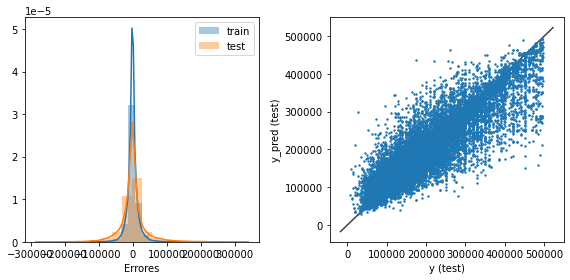

In [51]:
random_forest_optimizado = RandomForestRegressor(bootstrap=final_input.iloc[0,0], max_depth=final_input.iloc[1,0], max_features=final_input.iloc[2,0],
                                                 min_samples_split=final_input.iloc[3,0],n_estimators=final_input.iloc[4,0])

random_forest_optimizado.fit(X_train, y_train)

y_train_pred = random_forest_optimizado.predict(X_train)
y_test_pred = random_forest_optimizado.predict(X_test)
    
    
print(f'Modelo: Random Forest Regressor Optimizado')

score_train = random_forest_optimizado.score(X_train, y_train)
score_test = random_forest_optimizado.score(X_test, y_test)
cross_score=cross_val_score(random_forest_optimizado, X_train, y_train)
cross_score_mean=cross_score.mean()
print(f'Coeficiente de determinación en Train: {score_train}')
print(f'Coeficiente de determinación en Test: {score_test}')
print('Cross validation array:',cross_score,'Cross validation mean:',cross_score_mean)
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('Errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Interpretando los gráficos, se observa en el histrograma una distribución del error de tipo gaussiana y centrada en cero lo cual es bueno. 

El diagrama de dispersión nos muestra como se traducen los errores del modelo, se puede observar una densidad considerablemente mayor alrededor de la recta diagonal lo cuál también es buen indicador.

Es importante agregar que la consistencia en los valores de la validación cruzada nos indican que existe independencia entre los resultados y la partición entre datos de entrenamiento y datos de validación.

## **PARTE C**: **Interpretación de Modelos**



A) **Análisis de Features**

Ahora que ya tenemos nuestro modelo listo, es interesante ver que variables ha considerado más importantes para realizar las predicciones. Para ello, utilizaré la función `feature_importances`

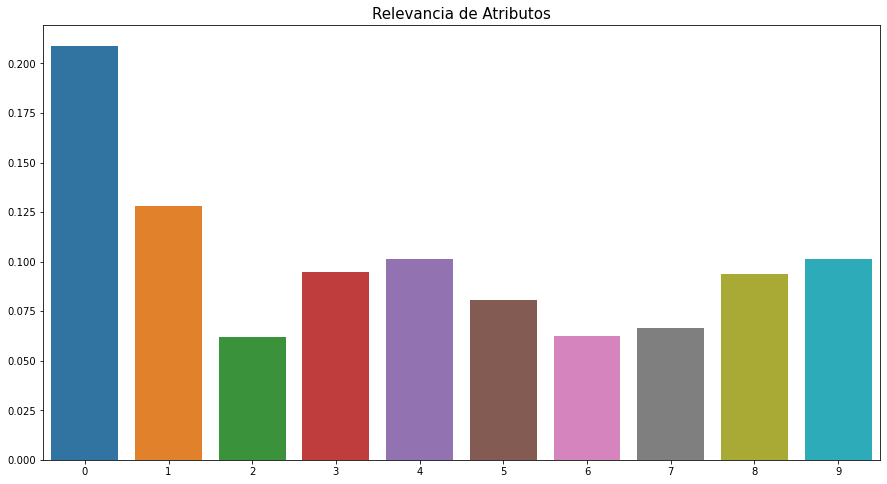

In [63]:
random_forest_optimizado.feature_importances_
importances = random_forest_optimizado.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.title('Relevancia de Atributos', fontsize=15)
plt.show()

El gráfico indica que los atributos mas importantes del modelo fueron 0 y 1. 

Podemos observar que los atributos con los que trabajó el modelo no son los originales sino que son las componentes principales. Dichas componentes son una combinación lineal de las variables originales y las obtuvimos en el preprocesamiento cuando aplicamos PCA. Simplificando el concepto, las componentes principales respresentan aquellas direcciones en las que se captura la mayor información del dataset.

Ahora bien, a simple vista, la "dirección" de mayor información no ayuda mucho para entender el problema. Para solucionar esto voy a asociar las componentes principales con las variables originales del modelo. 

Para ello, haré una matriz que me indique el peso de cada variable original en la componente principal.

In [64]:
pd.DataFrame(pca.components_,columns=properati2.drop(['price'],axis=1).columns,index = ['0','1','2','3','4','5','6','7','8','9'])

,rooms,bedrooms,bathrooms,surface_total,surface_covered,l2_Bs.As. G.B.A. Zona Norte,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal,l3_Abasto,...,l3_Villa del Parque,property_type_Casa,property_type_Casa de campo,property_type_Cochera,property_type_Departamento,property_type_Depósito,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro
0,0.468911,0.465710,0.351675,0.449451,0.478745,0.012276,0.002122,0.007552,-0.021950,0.000209,...,-0.000161,0.042166,0.000002,-0.000014,-0.075397,0.000003,0.000007,0.000066,-0.000398,0.000357
1,-0.233726,-0.206073,0.909005,-0.159498,-0.056162,0.063371,-0.040937,-0.053619,0.031185,0.000002,...,-0.003023,-0.069127,-0.000017,0.000002,0.163461,0.000032,-0.000139,-0.000186,-0.000132,0.000080
2,-0.390621,-0.448349,-0.048199,0.558802,0.265892,0.224201,0.066210,0.075161,-0.365572,-0.004159,...,-0.004114,0.129147,0.000019,-0.000005,-0.162864,0.000047,-0.000085,0.000022,0.001064,0.000123
3,0.238668,0.203703,0.033038,-0.262490,-0.256340,0.466221,0.083131,0.110462,-0.659813,-0.001132,...,-0.010700,0.001482,0.000003,0.000029,0.021065,-0.000019,0.000110,0.000024,-0.002537,-0.000425
4,0.063578,0.009546,0.210574,0.114872,-0.438342,-0.396851,0.233216,0.275366,-0.111732,0.000031,...,0.004486,0.189559,0.000029,0.000145,-0.560921,0.000024,0.000371,0.000215,0.010351,0.001589
5,-0.018194,0.144069,0.018596,0.378810,-0.517943,0.347760,-0.148580,-0.457598,0.258419,0.001625,...,0.011658,0.031465,-0.000026,-0.000004,-0.224628,0.000009,0.000351,0.000040,0.002853,-0.000509
6,0.160669,-0.066275,-0.012855,0.416545,-0.378527,-0.127657,-0.130264,0.327022,-0.069102,-0.001036,...,-0.010003,-0.074797,-0.000056,-0.000074,0.569454,-0.000168,-0.000777,-0.000075,-0.021661,-0.002579
7,0.013954,-0.017750,0.006593,-0.195451,0.143375,0.083723,0.033134,-0.063672,-0.053184,-0.003664,...,-0.009326,0.047402,0.000021,0.000037,-0.277834,0.000055,0.000369,0.000260,0.007784,0.001165
8,-0.142269,0.159621,-0.016160,0.104328,-0.045977,-0.163953,0.685122,-0.386220,-0.134949,0.000297,...,-0.007469,-0.051019,0.000077,-0.000128,0.308633,-0.000064,-0.000326,-0.000121,-0.009719,-0.001982
9,-0.678509,0.664860,-0.010529,0.021302,0.002370,-0.017644,-0.147913,0.221486,-0.055929,0.002811,...,-0.000867,0.021677,-0.000016,0.000086,0.021989,0.000074,0.000080,-0.000257,-0.000559,-0.000809


De esta manera podemos interpretar mejor el funcionamiento. Por ejemplo, el peso de la variable `rooms` en la componente de mayor importancia (componente 0) es 0.468, el peso de `bedrooms` 0.465, `bathrooms` 0.351 y sucesivamente.

B) **Importancia de atributos por árboles aislados**



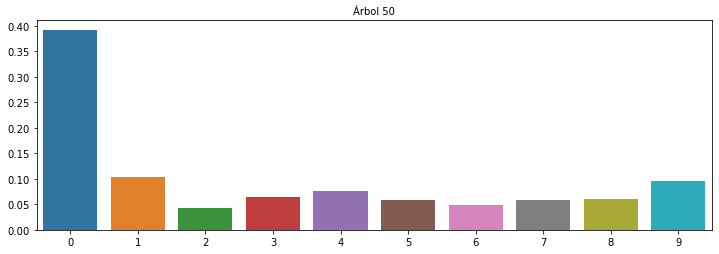

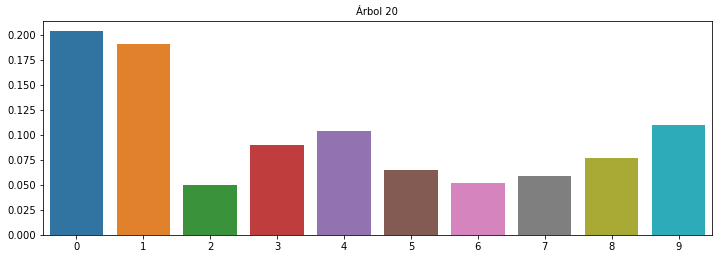

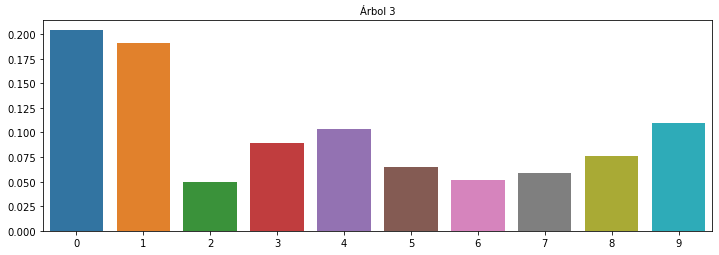

In [55]:
reg_tree_1 = random_forest_optimizado.estimators_[50]
reg_tree_1.feature_importances_
reg_tree_1_importances = reg_tree_1.feature_importances_
reg_tree_1_columns = X_train.columns
reg_tree_1_indices = np.argsort(reg_tree_1_importances)[::-1]
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
sns.barplot(reg_tree_1_columns[indices], reg_tree_1_importances[reg_tree_1_indices])
plt.title('Árbol 50', fontsize=10)
plt.tight_layout()

reg_tree_2 = random_forest_optimizado.estimators_[20]
reg_tree_2.feature_importances_
reg_tree_2_importances = reg_tree_2.feature_importances_
reg_tree_2_columns = X_train.columns
reg_tree_2_indices = np.argsort(reg_tree_2_importances)[::-1]
plt.figure(figsize = (10,10))
plt.subplot(3,1,2)
sns.barplot(reg_tree_2_columns[indices], reg_tree_2_importances[reg_tree_2_indices])
plt.title('Árbol 20', fontsize=10)
plt.tight_layout()
plt.show()

reg_tree_3 = random_forest_optimizado.estimators_[3]
reg_tree_3.feature_importances_
reg_tree_3_importances = reg_tree_2.feature_importances_
reg_tree_3_columns = X_train.columns
reg_tree_3_indices = np.argsort(reg_tree_3_importances)[::-1]
plt.figure(figsize = (10,10))
plt.subplot(3,1,3)
sns.barplot(reg_tree_2_columns[indices], reg_tree_2_importances[reg_tree_2_indices])
plt.title('Árbol 3', fontsize=10)
plt.tight_layout()
plt.show()

Realizar el mismo análisis del apartado A sobre algunos árboles al azar del modelo nos puede ayudar a entender la mecánica de trabajo de RandomForest.

Ya sabemos que se trata de un modelo ensabmle que aplica Bagging. Al aplicar esta técnica vamos a tener tantos modelos como muestras hayamos sacado, pero todos entrenados sobre una porción distinta del dataset y en base a diferentes atributos. Es decir, son parecidos, pero distintos. De esta forma, cada modelo conoce solo una parte de las instancias y atributos, mientras que no vio al resto.

En consecuencia vemos que al analizar árboles indiviudales al azar, la importancia de los atributos varía entre uno y otro.

C) **Distribución de errores**

Como ya vimos al final de la parte B, la distribución de errores del modelo es de tipo gaussiana, con una marcada concentración alrededor de 0 tanto en el conjunto Train como Test.